## Import Packages

In [303]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline

## Prepare the dataset

In [304]:
data = pd.read_csv("Salary_dataset.csv")
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [305]:
data = data.drop("Unnamed: 0", axis=1)
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [306]:
X = data["YearsExperience"].values
y = data["Salary"].values

print(X.shape, y.shape)

(30,) (30,)


## Batch Gradient Descent

In [348]:
def GD(X, y, lr=0.001, epochs=1000, show_progress=True, convergence=1e-4):
    theta0 = theta1 = 0
    theta0s, theta1s, costs, scores = [], [], [], []
    history = {}
    for i in range(epochs + 1):
        y_hat = theta0 + theta1 * X
        m = X.shape[0]

        cost = 1 / (2 * m) * np.sum((y_hat - y) ** 2)
        grad0 = 1 / m * np.sum(y_hat - y)
        grad1 = 1 / m * np.sum((y_hat - y) * X)

        if show_progress:
            print(f"Epoch {i}: Cost = {cost}, grad0 = {grad0}, grad1 = {grad1}")
            print("---------------------------------------------------------------------")

        theta0 -= lr * grad0
        theta1 -= lr * grad1

        theta0s.append(theta0)
        theta1s.append(theta1)
        costs.append(cost)

        ss_res = np.sum((y - y_hat) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2_score = 1 - (ss_res / ss_tot)
        scores.append(r2_score*100)

        if convergence and i > 0 and abs(costs[-2] - costs[-1]) < convergence:
            break

    history["theta0s"] = theta0s
    history["theta1s"] = theta1s
    history["costs"] = costs
    history["scores"] = scores
    history["optimal_theta0"] = theta0
    history["optimal_theta1"] = theta1
    history["convergence_epoch"] = i

    return history

In [357]:
history = GD(X, y, lr=0.0001, epochs=1000, convergence=1e-4)

Epoch 0: Cost = 3251553638.866667, grad0 = -76004.0, grad1 = -485004.4133333334
---------------------------------------------------------------------
Epoch 1: Cost = 3227498696.8167243, grad0 = -75733.8505442489, grad1 = -483164.4207992409
---------------------------------------------------------------------
Epoch 2: Cost = 3203625651.0990014, grad0 = -75464.72415273514, grad1 = -481331.39891569666
---------------------------------------------------------------------
Epoch 3: Cost = 3179933126.1387095, grad0 = -75196.61694970685, grad1 = -479505.32127520343
---------------------------------------------------------------------
Epoch 4: Cost = 3156419756.7637277, grad0 = -74929.52507409488, grad1 = -477686.1615703064
---------------------------------------------------------------------
Epoch 5: Cost = 3133084188.125933, grad0 = -74663.44467945743, grad1 = -475873.8935932129
---------------------------------------------------------------------
Epoch 6: Cost = 3109925075.623126, grad0 = -7

In [358]:
history["scores"][-1]

80.62590430013825

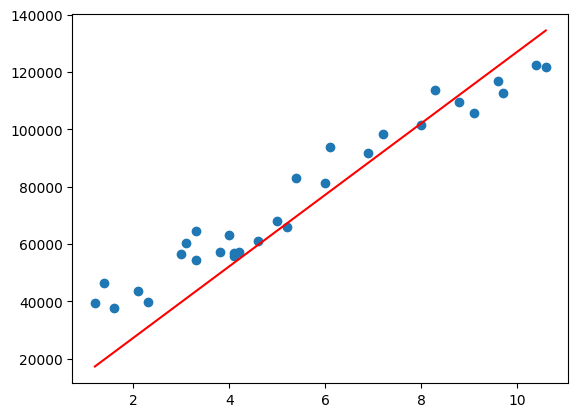

In [359]:
y_hat = history["optimal_theta0"] + history["optimal_theta1"] * X

plt.scatter(X,y)
plt.plot(X,y_hat, color = "red")
plt.show()

#### Score & loss vs. epochs

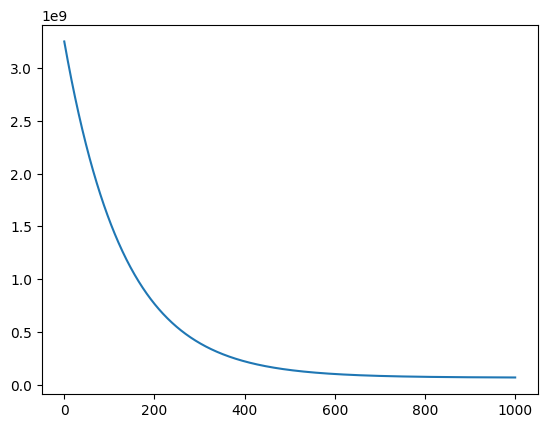

In [360]:
epochs = np.linspace(0, history["convergence_epoch"], history["convergence_epoch"] + 1)

plt.plot(epochs, history["costs"] )
plt.show()

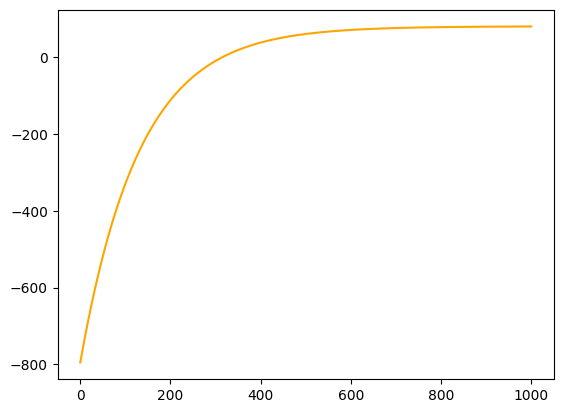

In [361]:
plt.plot(epochs, history["scores"] ,color = "orange" )
plt.show()

#### Theta_0 vs. loss and Theta_1 vs. loss

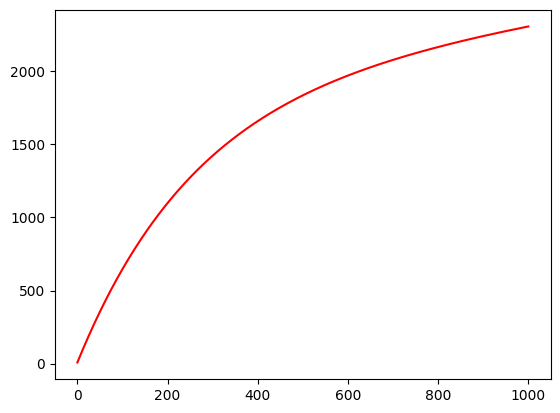

In [362]:
plt.plot(epochs, history["theta0s"] ,color = "red" )
plt.show()

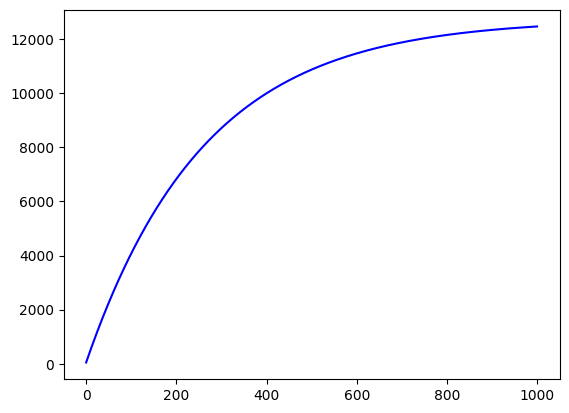

In [363]:
plt.plot(epochs, history["theta1s"] ,color = "blue" )
plt.show()

#### All regression lines till converge

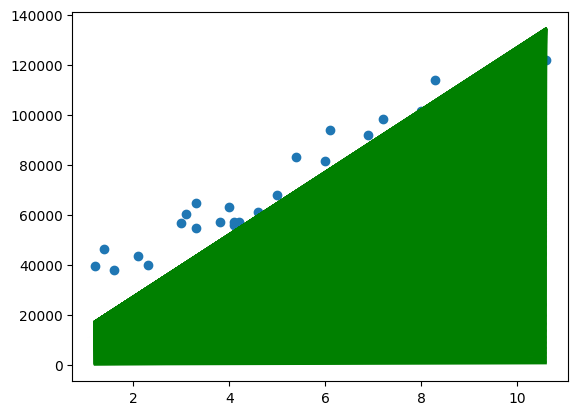

In [364]:
for i in range(epochs.shape[0]):
    y_hat = history["theta0s"][i] + history["theta1s"][i] * X
    plt.plot(X,y_hat, color = "green")
plt.scatter(X,y)
plt.show()

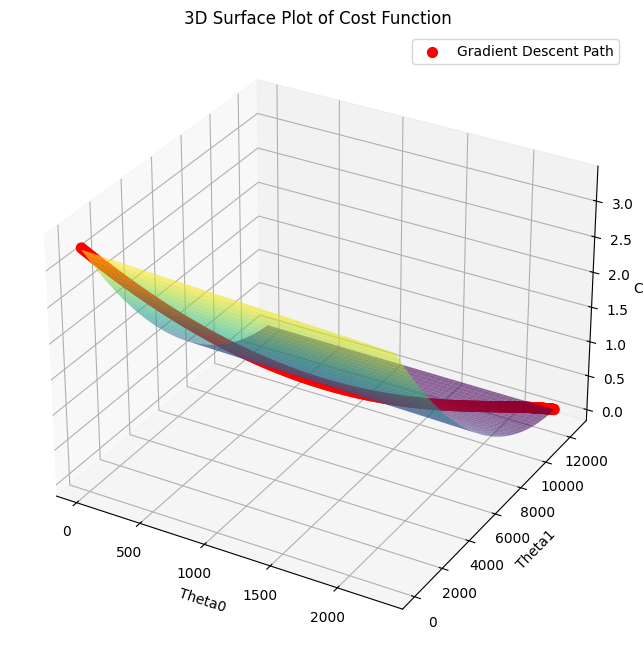

In [365]:
costs = history["costs"]
theta0s = history["theta0s"]
theta1s = history["theta1s"]

theta0_vals = np.linspace(min(theta0s) - 1, max(theta0s) + 1, 100)
theta1_vals = np.linspace(min(theta1s) - 1, max(theta1s) + 1, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)
cost_grid = np.zeros_like(theta0_grid)

for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        y_hat = theta0_grid[i, j] + theta1_grid[i, j] * X
        cost_grid[i, j] = 1 / (2 * len(X)) * np.sum((y_hat - y) ** 2)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(theta0_grid, theta1_grid, cost_grid, cmap="viridis", alpha=0.6)
ax.scatter(theta0s, theta1s, costs, color="red", s=50, label="Gradient Descent Path")
ax.set_xlabel("Theta0")
ax.set_ylabel("Theta1")
ax.set_zlabel("Cost")
ax.set_title("3D Surface Plot of Cost Function")
plt.legend()
plt.show()

## Mini-Batch GD


In [366]:
def mini_batch_GD(X, y, batch_size = 10, lr=0.001, epochs=1000, show_progress=True, convergence=1e-4):
    theta0 = theta1 = 0
    theta0s, theta1s, costs, scores = [], [], [], []
    history = {}
    m = X.shape[0]
    for epoch in range(epochs + 1):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, X.shape[0], batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            y_hat = theta0 + theta1 * X

            cost = 1 / (2 * m) * np.sum((y_hat - y) ** 2)
            grad0 = 1 / m * np.sum(y_hat - y)
            grad1 = 1 / m * np.sum((y_hat - y) * X)

            theta0 -= lr * grad0
            theta1 -= lr * grad1
        
        y_hat_batch = theta0 + theta1 * X
        cost = 1 / (2 * m) * np.sum((y_hat_batch - y) ** 2)
        costs.append(cost)
        
        if show_progress:
            print(f"Epoch {epoch}: Cost = {cost}, grad0 = {grad0}, grad1 = {grad1}")
            print("---------------------------------------------------------------------")

        ss_res = np.sum((y - y_hat_batch) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2_score = 1 - (ss_res / ss_tot)
        scores.append(r2_score*100)

        theta0s.append(theta0)
        theta1s.append(theta1)

        if convergence and epoch > 0 and abs(costs[-2] - costs[-1]) < convergence:
            break


    history["theta0s"] = theta0s
    history["theta1s"] = theta1s
    history["costs"] = costs
    history["scores"] = scores
    history["optimal_theta0"] = theta0
    history["optimal_theta1"] = theta1
    history["convergence_epoch"] = epoch

    return history

In [367]:
history = mini_batch_GD(X, y, batch_size = 10, lr=0.0001, epochs=1000)

Epoch 0: Cost = 3179933126.1387095, grad0 = -75464.72415273514, grad1 = -481331.39891569666
---------------------------------------------------------------------
Epoch 1: Cost = 3109925075.623126, grad0 = -74663.44467945743, grad1 = -475873.8935932129
---------------------------------------------------------------------
Epoch 2: Cost = 3041493180.968406, grad0 = -73871.23413521904, grad1 = -470478.17943784996
---------------------------------------------------------------------
Epoch 3: Cost = 2974601953.300701, grad0 = -73087.98984045969, grad1 = -465143.5568408016
---------------------------------------------------------------------
Epoch 4: Cost = 2909216702.8174133, grad0 = -72313.6102781723, grad1 = -459869.33411433647
---------------------------------------------------------------------
Epoch 5: Cost = 2845303520.795218, grad0 = -71547.99508074041, grad1 = -454654.8274021141
---------------------------------------------------------------------
Epoch 6: Cost = 2782829262.0032043, 

In [368]:
history["scores"][-1]

82.22396452434967

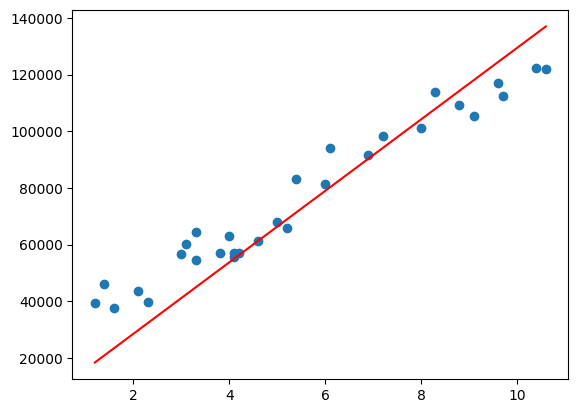

In [369]:
y_hat = history["optimal_theta0"] + history["optimal_theta1"] * X

plt.scatter(X,y)
plt.plot(X,y_hat, color = "red")
plt.show()

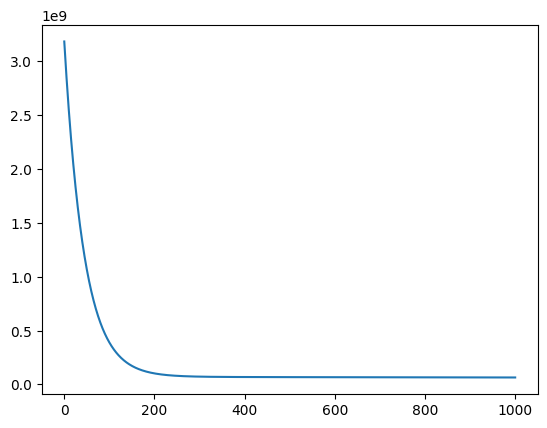

In [370]:
epochs = np.linspace(0, history["convergence_epoch"], history["convergence_epoch"] + 1)

plt.plot(epochs, history["costs"] )
plt.show()

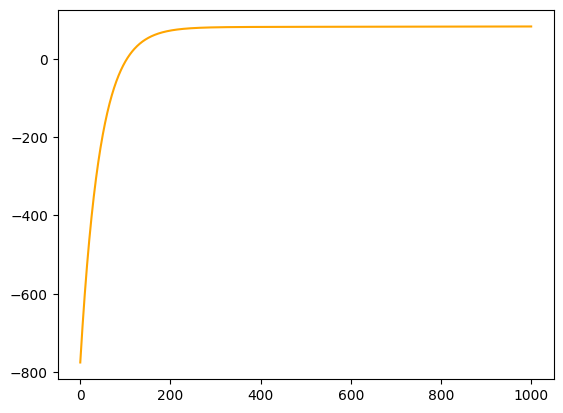

In [371]:
plt.plot(epochs, history["scores"] ,color = "orange" )
plt.show()

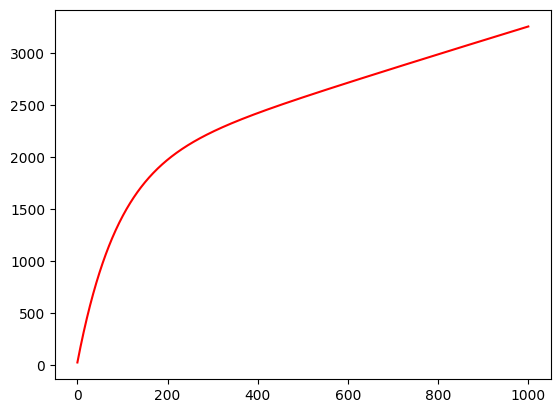

In [372]:
plt.plot(epochs, history["theta0s"] ,color = "red" )
plt.show()

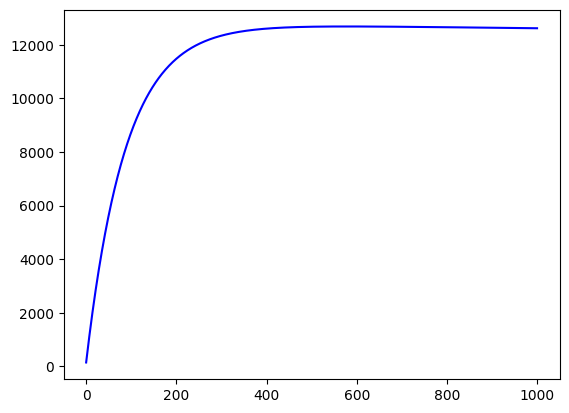

In [373]:
plt.plot(epochs, history["theta1s"] ,color = "blue" )
plt.show()

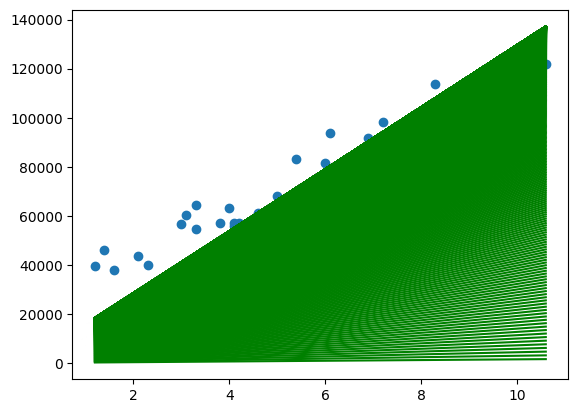

In [374]:
for i in range(epochs.shape[0]):
    y_hat = history["theta0s"][i] + history["theta1s"][i] * X
    plt.plot(X,y_hat, color = "green")
plt.scatter(X,y)
plt.show()

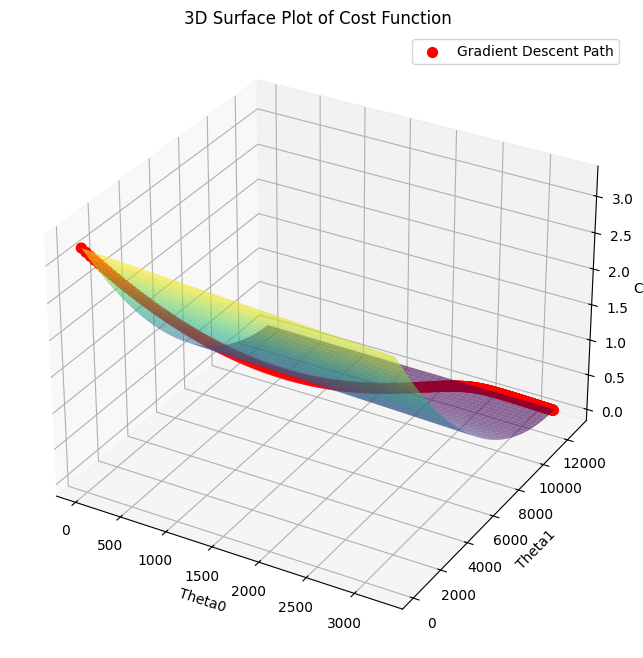

In [375]:
costs = history["costs"]
theta0s = history["theta0s"]
theta1s = history["theta1s"]

theta0_vals = np.linspace(min(theta0s) - 1, max(theta0s) + 1, 100)
theta1_vals = np.linspace(min(theta1s) - 1, max(theta1s) + 1, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)
cost_grid = np.zeros_like(theta0_grid)

for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        y_hat = theta0_grid[i, j] + theta1_grid[i, j] * X
        cost_grid[i, j] = 1 / (2 * len(X)) * np.sum((y_hat - y) ** 2)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(theta0_grid, theta1_grid, cost_grid, cmap="viridis", alpha=0.6)
ax.scatter(theta0s, theta1s, costs, color="red", s=50, label="Gradient Descent Path")
ax.set_xlabel("Theta0")
ax.set_ylabel("Theta1")
ax.set_zlabel("Cost")
ax.set_title("3D Surface Plot of Cost Function")
plt.legend()
plt.show()

## Stochastic GD

In [376]:
import numpy as np

def SGD(X, y, lr=0.001, epochs=1000, show_progress=True , convergence=1e-4):
    theta0 = theta1 = 0
    theta0s, theta1s, costs, scores = [], [], [], []
    history = {}
    m = X.shape[0]

    for epoch in range(epochs + 1):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(m):
            X_example = X_shuffled[i]
            y_example = y_shuffled[i]

            y_hat = theta0 + theta1 * X_example

            grad0 = (y_hat - y_example)
            grad1 = (y_hat - y_example) * X_example

            theta0 -= lr * grad0
            theta1 -= lr * grad1

        y_hat_full = theta0 + theta1 * X
        cost = 1 / (2 * m) * np.sum((y_hat_full - y) ** 2)
        costs.append(cost)

        ss_res = np.sum((y - y_hat_full) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2_score = 1 - (ss_res / ss_tot)
        scores.append(r2_score * 100)

        theta0s.append(theta0)
        theta1s.append(theta1)

        if show_progress:
            print(f"Epoch {epoch}: Cost = {cost}, theta0 = {theta0}, theta1 = {theta1}")
            print("---------------------------------------------------------------------")

        if convergence and epoch > 0 and abs(costs[-2] - costs[-1]) < convergence:
            break

    history["theta0s"] = theta0s
    history["theta1s"] = theta1s
    history["costs"] = costs
    history["scores"] = scores
    history["optimal_theta0"] = theta0
    history["optimal_theta1"] = theta1
    history["convergence_epoch"] = epoch

    return history

In [377]:
history = SGD(X, y, lr=0.0001, epochs=1000)

Epoch 0: Cost = 2603138642.9525633, theta0 = 217.13973990206284, theta1 = 1379.0005539788092
---------------------------------------------------------------------
Epoch 1: Cost = 2086393620.923742, theta0 = 412.0866873217095, theta1 = 2610.5533846515127
---------------------------------------------------------------------
Epoch 2: Cost = 1674922146.4354668, theta0 = 586.8089723130047, theta1 = 3709.631840065341
---------------------------------------------------------------------
Epoch 3: Cost = 1347711961.9817452, theta0 = 744.6679191686773, theta1 = 4688.915048635378
---------------------------------------------------------------------
Epoch 4: Cost = 1087410743.669799, theta0 = 886.9989412484052, theta1 = 5561.73639785338
---------------------------------------------------------------------
Epoch 5: Cost = 880004140.6284517, theta0 = 1015.4852428831236, theta1 = 6340.909296004278
---------------------------------------------------------------------
Epoch 6: Cost = 715192695.5072783,

In [378]:
history["scores"][-1]

91.26582149956188

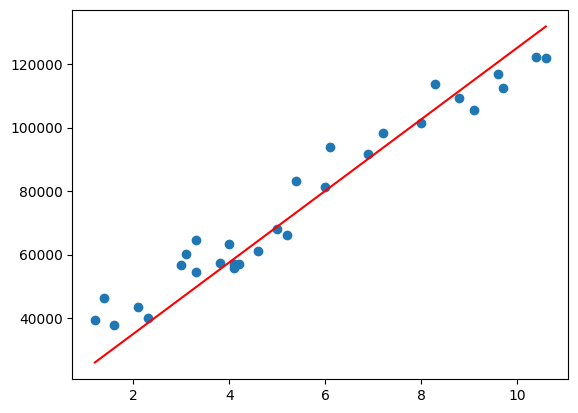

In [379]:
y_hat = history["optimal_theta0"] + history["optimal_theta1"] * X

plt.scatter(X,y)
plt.plot(X,y_hat, color = "red")
plt.show()

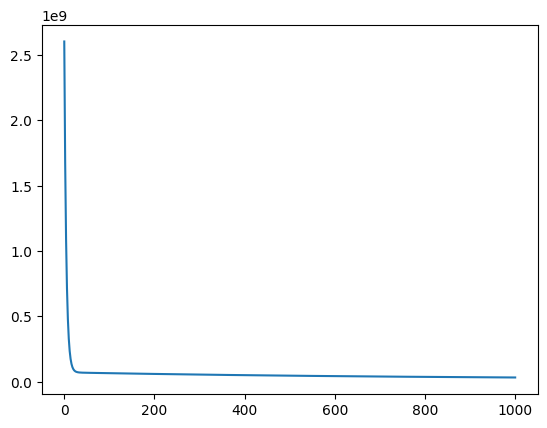

In [380]:
epochs = np.linspace(0, history["convergence_epoch"], history["convergence_epoch"] + 1)

plt.plot(epochs, history["costs"] )

plt.show()

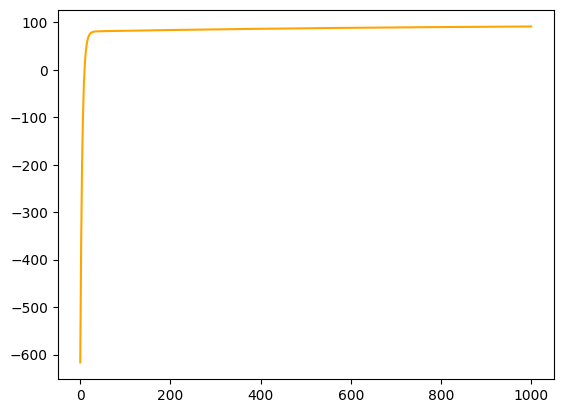

In [381]:
plt.plot(epochs, history["scores"] ,color = "orange" )

plt.show()

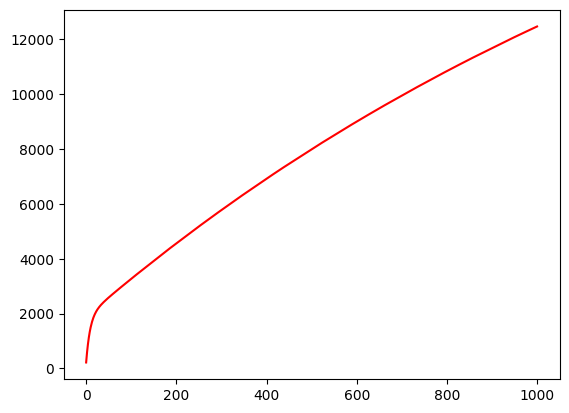

In [382]:
plt.plot(epochs, history["theta0s"] ,color = "red" )
plt.show()

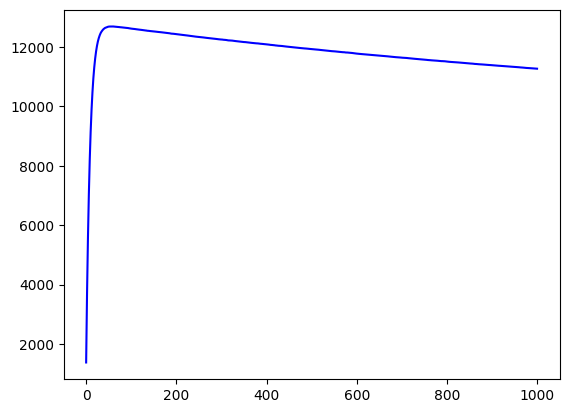

In [383]:
plt.plot(epochs, history["theta1s"] ,color = "blue" )
plt.show()

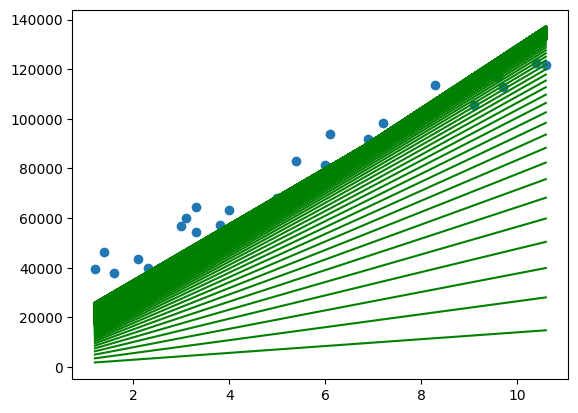

In [384]:
for i in range(epochs.shape[0]):
    y_hat = history["theta0s"][i] + history["theta1s"][i] * X
    plt.plot(X,y_hat, color = "green")
plt.scatter(X,y)
plt.show()

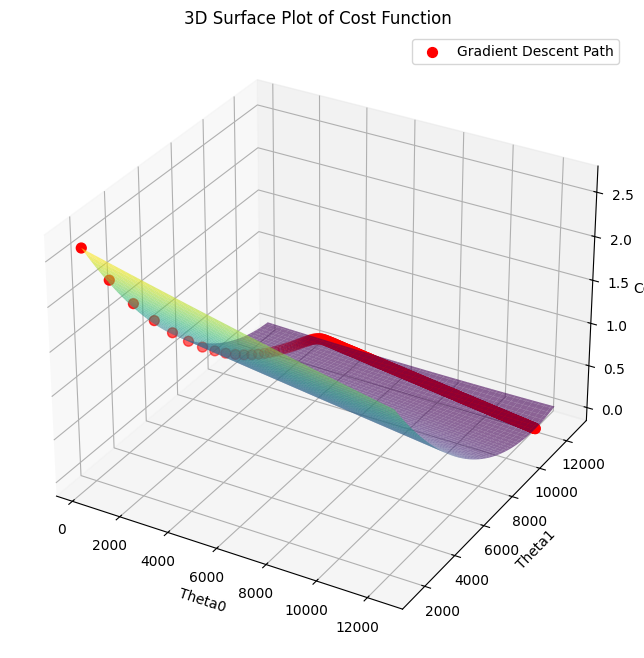

In [385]:
costs = history["costs"]
theta0s = history["theta0s"]
theta1s = history["theta1s"]

theta0_vals = np.linspace(min(theta0s) - 1, max(theta0s) + 1, 100)
theta1_vals = np.linspace(min(theta1s) - 1, max(theta1s) + 1, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)
cost_grid = np.zeros_like(theta0_grid)

for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        y_hat = theta0_grid[i, j] + theta1_grid[i, j] * X
        cost_grid[i, j] = 1 / (2 * len(X)) * np.sum((y_hat - y) ** 2)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(theta0_grid, theta1_grid, cost_grid, cmap="viridis", alpha=0.6)
ax.scatter(theta0s, theta1s, costs, color="red", s=50, label="Gradient Descent Path")
ax.set_xlabel("Theta0")
ax.set_ylabel("Theta1")
ax.set_zlabel("Cost")
ax.set_title("3D Surface Plot of Cost Function")
plt.legend()
plt.show()

## Comparison between the 3 models

In [386]:
GD_hist = GD(X, y, lr=0.001, epochs=100, show_progress=False, convergence=None)
min_batch_hist = mini_batch_GD(X, y, lr=0.001, epochs=100, show_progress=False, convergence=None)
SGD_hist = SGD(X, y, lr=0.001, epochs=100, show_progress=False,convergence=None)

In [387]:
print(GD_hist["scores"][-1])
print(min_batch_hist["scores"][-1])
print(SGD_hist["scores"][-1])

80.68096057617164
82.23906103152258
91.36025798381235


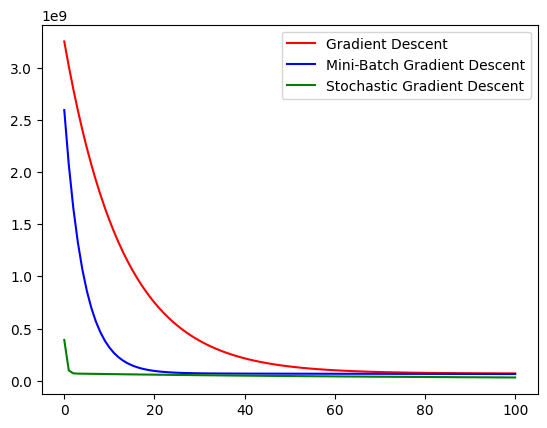

In [388]:
epoch = np.linspace(0, 100, 101)

plt.plot(epoch, GD_hist["costs"] ,color = "red" )
plt.plot(epoch, min_batch_hist["costs"] ,color = "blue" )
plt.plot(epoch, SGD_hist["costs"] ,color = "green" )
plt.legend(["Gradient Descent", "Mini-Batch Gradient Descent", "Stochastic Gradient Descent"])
plt.show()

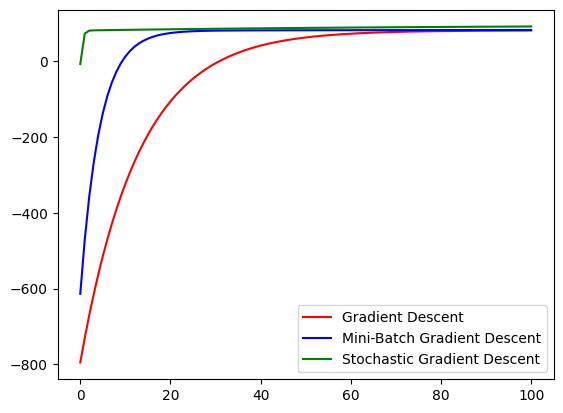

In [389]:
plt.plot(epoch, GD_hist["scores"] ,color = "red" )
plt.plot(epoch, min_batch_hist["scores"] ,color = "blue" )
plt.plot(epoch, SGD_hist["scores"] ,color = "green" )
plt.legend(["Gradient Descent", "Mini-Batch Gradient Descent", "Stochastic Gradient Descent"])
plt.show()

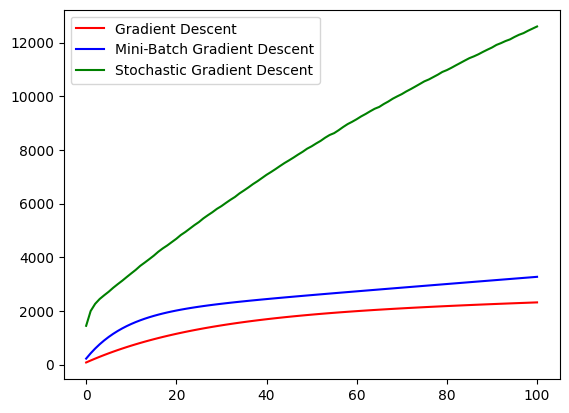

In [390]:
plt.plot(epoch, GD_hist["theta0s"] ,color = "red" )
plt.plot(epoch, min_batch_hist["theta0s"] ,color = "blue" )
plt.plot(epoch, SGD_hist["theta0s"] ,color = "green" )
plt.legend(["Gradient Descent", "Mini-Batch Gradient Descent", "Stochastic Gradient Descent"])
plt.show()

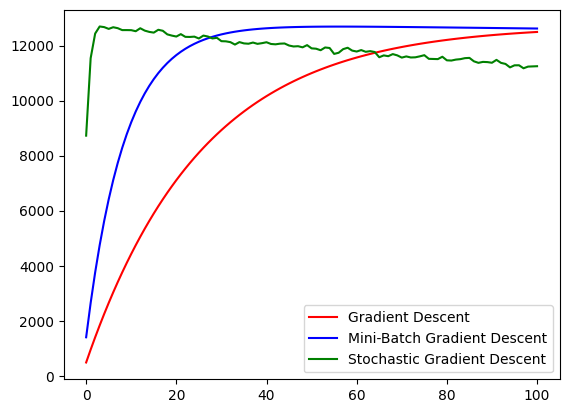

In [391]:
plt.plot(epoch, GD_hist["theta1s"] ,color = "red" )
plt.plot(epoch, min_batch_hist["theta1s"] ,color = "blue" )
plt.plot(epoch, SGD_hist["theta1s"] ,color = "green" )
plt.legend(["Gradient Descent", "Mini-Batch Gradient Descent", "Stochastic Gradient Descent"])
plt.show()

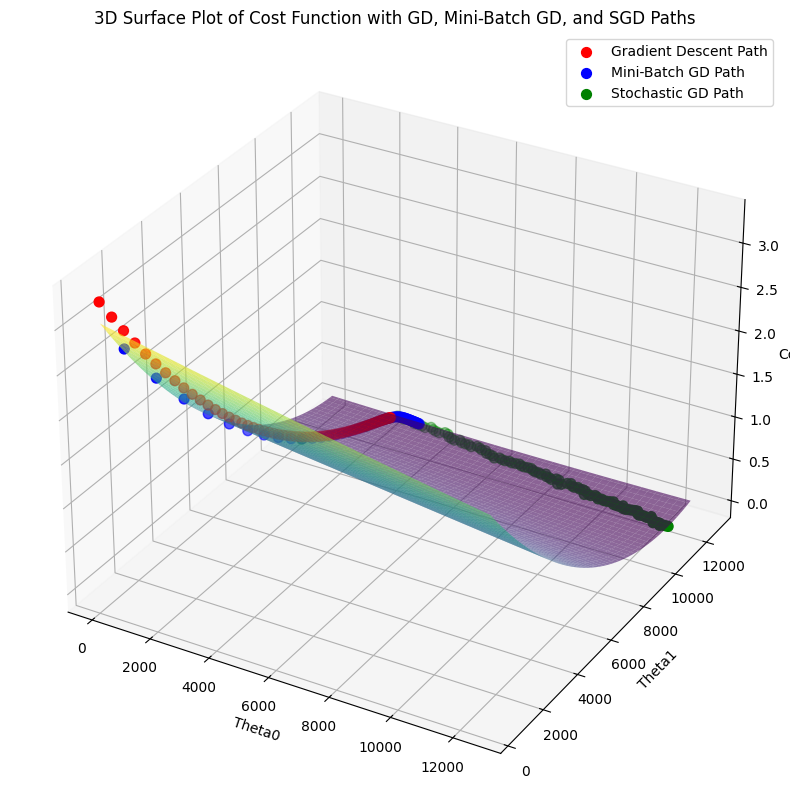

In [392]:
costs_gd = GD_hist["costs"]
theta0s_gd = GD_hist["theta0s"]
theta1s_gd = GD_hist["theta1s"]

costs_minibatch = min_batch_hist["costs"]
theta0s_minibatch = min_batch_hist["theta0s"]
theta1s_minibatch = min_batch_hist["theta1s"]

costs_sgd = SGD_hist["costs"]
theta0s_sgd = SGD_hist["theta0s"]
theta1s_sgd = SGD_hist["theta1s"]

theta0_vals = np.linspace(min(min(theta0s_gd), min(theta0s_minibatch), min(theta0s_sgd)) - 1,
                          max(max(theta0s_gd), max(theta0s_minibatch), max(theta0s_sgd)) + 1, 100)
theta1_vals = np.linspace(min(min(theta1s_gd), min(theta1s_minibatch), min(theta1s_sgd)) - 1,
                          max(max(theta1s_gd), max(theta1s_minibatch), max(theta1s_sgd)) + 1, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)
cost_grid = np.zeros_like(theta0_grid)

for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        y_hat = theta0_grid[i, j] + theta1_grid[i, j] * X
        cost_grid[i, j] = 1 / (2 * len(X)) * np.sum((y_hat - y) ** 2)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(theta0_grid, theta1_grid, cost_grid, cmap="viridis", alpha=0.6)
ax.scatter(theta0s_gd, theta1s_gd, costs_gd, color="red", s=50, label="Gradient Descent Path")
ax.scatter(theta0s_minibatch, theta1s_minibatch, costs_minibatch, color="blue", s=50, label="Mini-Batch GD Path")
ax.scatter(theta0s_sgd, theta1s_sgd, costs_sgd, color="green", s=50, label="Stochastic GD Path")
ax.set_xlabel("Theta0")
ax.set_ylabel("Theta1")
ax.set_zlabel("Cost")
ax.set_title("3D Surface Plot of Cost Function with GD, Mini-Batch GD, and SGD Paths")
plt.legend()
plt.show()